# Projet d'économétrie

- Amara Hamid
- De vericourt Betrand
- Vignes Raphaël

## Partie 1 - Régression

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats.mstats as ms
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from scipy import stats
from dateutil.parser import parse
from math import *
import statsmodels.formula.api as smf

### 1. Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [276]:
names = [
    'inlf',                    # =1 if in labor force, 1975
    'hours',                   # hours worked, 1975
    'kidslt6',                 # #kids < 6 years
    'kidsge6',                 # #kids 6-18
    'age',                     # woman's age in yrs
    'educ',                    # years of schooling
    'wage',                    # estimated wage from earns., hours
    'repwage',                 # reported wage at interview in 1976
    'hushrs',                  # hours worked by husband, 1975
    'husage',                  # husband's age
    'huseduc',                 # husband's years of schooling
    'huswage',                 # husband's hourly wage, 1975
    'faminc',                  # family income, 1975
    'mtr',                     # fed. marginal tax rate facing woman
    'motheduc',                # mother's years of schooling
    'fatheduc',                # father's years of schooling
    'unem',                    # unem. rate in county of resid.
    'city',                    # =1 if live in SMSA
    'exper',                   # actual labor mkt exper
    'nwifeinc',                # (faminc - wage*hours)/1000
    'lwage',                   # log(wage)
    'expersq',                 # exper^2
]

df = pd.read_csv('textfiles/MROZ.raw', sep='\s+', names=names, decimal='.') # Chargement des données
cols = ['wage', 'huswage']
for c in cols: # Problème à gérer avec la colonne wage
    df[c] = [0. if w=='.' else float(w) for w in df[c]]
df = df[df.wage > 0.]
print(df.head())

   inlf  hours  kidslt6  kidsge6  age  educ    wage  repwage  hushrs  husage  \
0     1   1610        1        0   32    12  3.3540     2.65    2708      34   
1     1   1656        0        2   30    12  1.3889     2.65    2310      30   
2     1   1980        1        3   35    12  4.5455     4.04    3072      40   
3     1    456        0        3   34    12  1.0965     3.25    1920      53   
4     1   1568        1        2   31    14  4.5918     3.60    2000      32   

    ...     faminc     mtr  motheduc  fatheduc  unem  city  exper   nwifeinc  \
0   ...      16310  0.7215        12         7   5.0     0     14  10.910060   
1   ...      21800  0.6615         7         7  11.0     1      5  19.499980   
2   ...      21040  0.6915        12         7   5.0     0     15  12.039910   
3   ...       7300  0.7815         7         7   5.0     0      6   6.799996   
4   ...      27300  0.6215        12        14   9.5     1      7  20.100060   

      lwage  expersq  
0  1.210154    

### 2. Faire les statistiques descriptives du salaire, de l’age et de l’éducation  pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieur à la médiane de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon

In [277]:
print('- Ensemble des femmes -\n',df[['wage','educ']].describe()) # Stats descriptives ensemble femmes
print('\n- Salaire hommes supérieur médiane femmes -\n',df[df['huswage'] > df['wage'].median()][['wage','educ']].describe())
print('\n- Salaire hommes inférieur médiane femmes -\n',df[df['huswage'] < df['wage'].median()][['wage','educ']].describe())



- Ensemble des femmes -
              wage        educ
count  428.000000  428.000000
mean     4.177682   12.658879
std      3.310282    2.285376
min      0.128200    5.000000
25%      2.262600   12.000000
50%      3.481900   12.000000
75%      4.970750   14.000000
max     25.000000   17.000000

- Salaire hommes supérieur médiane femmes -
              wage        educ
count  380.000000  380.000000
mean     4.209165   12.684211
std      3.335807    2.299538
min      0.128200    5.000000
25%      2.274725   12.000000
50%      3.566500   12.000000
75%      5.089100   14.000000
max     25.000000   17.000000

- Salaire hommes inférieur médiane femmes -
             wage       educ
count  48.000000  48.000000
mean    3.928438  12.458333
std     3.122774   2.182701
min     1.201900   8.000000
25%     2.135750  11.750000
50%     2.945800  12.000000
75%     4.352375  14.000000
max    18.267000  16.000000


### 3. Faire l'histogramme de la variable wage. Calculer le log de wage et faire l'histogramme. Comparez les deux histogrammes et commentez

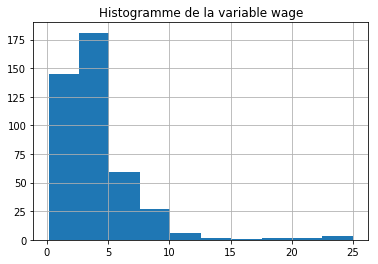

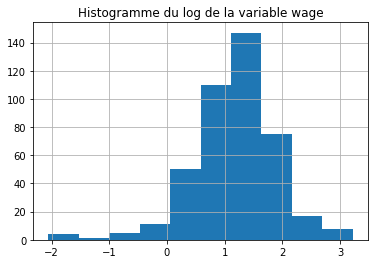

In [278]:
df['wage'].hist()
plt.title('Histogramme de la variable wage')
plt.show()
df['logwage'] = df['wage'].apply(np.log)
df['logwage'].hist()
plt.title('Histogramme du log de la variable wage')
plt.show()

Sous forme logarithmique, le salaire se rapproche d'une distribution suivant une loi normale.

### 4. Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives ?

In [279]:
corr, pvalue =ms.spearmanr(df['motheduc'], df['fatheduc'])
print(corr, pvalue)

0.55073278224 2.5800056955163443e-35


Ces deux variables sont corrélées, avec une pvalue à 2.6e-35 donc elle est largement significative à 5% ou 1% par exemple. Il y'a donc un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives.

### 5. Faites un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc. Commentez. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

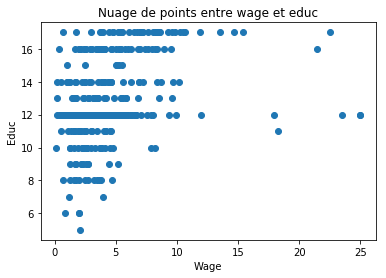

0.384384223428 1.611334244070839e-16


In [280]:
plt.scatter(df['wage'], df['educ'])
plt.title('Nuage de points entre wage et educ')
plt.xlabel('Wage')
plt.ylabel('Educ')
plt.show()
corr, pvalue =ms.spearmanr(df['wage'], df['educ'])
print(corr, pvalue)


Nous voyons que plus la femme est éduquée, plus la borne supérieure de salaire est élevée, mais également que la dispersion des salaires augmente fortement avec le niveau d'éducation.
Il y'a un effet ceteris paribus, nous observons une corrélation significative de 0.4 entre les deux variables.

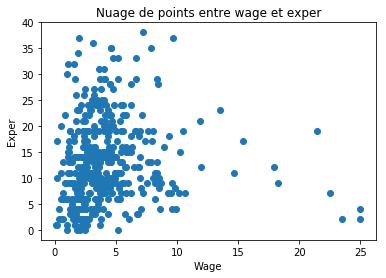

0.204591549094 1.995029269046062e-05


In [281]:
plt.scatter(df['wage'], df['exper'])
plt.title('Nuage de points entre wage et exper')
plt.xlabel('Wage')
plt.ylabel('Exper')
plt.show()

corr, pvalue =ms.spearmanr(df['wage'], df['exper'])
print(corr, pvalue)

Nous voyons qu'il y'a globalement une relation linéaire croissante entre l'expérience et le salaire, en revanche nous observons un effectif de trés hauts salaires indépendant de l'expérience.
Il y a un léger effet ceteris paribus sur ce couple de variables, nous observons une corélation de 0.2 significative.

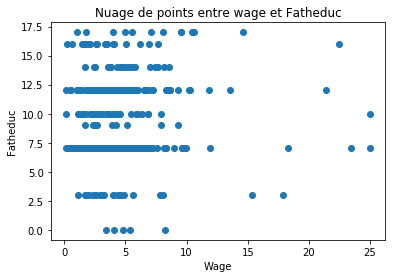

0.116329267902 0.016049839999148826


In [282]:
plt.scatter(df['wage'], df['fatheduc'])
plt.title('Nuage de points entre wage et Fatheduc')
plt.xlabel('Wage')
plt.ylabel('Fatheduc')
plt.show()
corr, pvalue =ms.spearmanr(df['wage'], df['fatheduc'])
print(corr, pvalue)

Nous observons que le salaire est relativement indépendant du niveau d'éducation du père.
Il n'y a pas d'effet ceteris paribus, la corélation est très faible et non significative à 1%.

### 6. Quelle est l'hypothèse fondamentale qui garantit des estimateurs non biaisés ? Expliquer le biais de variable omise

L'hypothèse fondamentale est que les variables explicatives ne sont pas corélées au résidu. Si l'on a une variable omise, alors elle est corrélée avec le résultat et la régression des MCO est biaisée.

### 7. Faire la régression de wage en utilisant les variables explicatives une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus.

In [283]:
const = pd.DataFrame(np.ones(428))
print(df.shape)
X = pd.concat([const,df[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]], ignore_index=True, axis=1)
X.columns = ['const','city','educ','exper','nwifeinc','kidslt6','kidsge6']
y = df['wage']
print(X.head())

(428, 23)
   const  city  educ  exper   nwifeinc  kidslt6  kidsge6
0    1.0     0    12     14  10.910060        1        0
1    1.0     1    12      5  19.499980        0        2
2    1.0     0    12     15  12.039910        1        3
3    1.0     0    12      6   6.799996        0        3
4    1.0     1    14      7  20.100060        1        2


In [284]:
B = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)
print(list(zip(X.columns,B)))

[('const', -2.403453991547134), ('city', 0.36975202950519659), ('educ', 0.46004770125863242), ('exper', 0.023819947951075317), ('nwifeinc', 0.015244793576326351), ('kidslt6', 0.036173191389278325), ('kidsge6', -0.061890909685711731)]


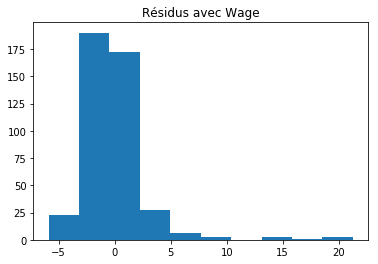

In [285]:
y = y.reshape(428,1)
res =  np.subtract(y, np.dot(B.reshape(1,-1),X.T).T)
plt.hist(res)
plt.title('Résidus avec Wage')
plt.show()

### 8. Faire la régression de lwage sur les variables (une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6). Comparer l’histogramme obtenu à celui de la question 7.



In [286]:
const = pd.DataFrame(np.ones(428))
print(df.shape)
X = pd.concat([const,df[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]], ignore_index=True, axis=1)
X.columns = ['const','city','educ','exper','nwifeinc','kidslt6','kidsge6']
#X = X.astype(float)
y = df['logwage']
print(X.head())

(428, 23)
   const  city  educ  exper   nwifeinc  kidslt6  kidsge6
0    1.0     0    12     14  10.910060        1        0
1    1.0     1    12      5  19.499980        0        2
2    1.0     0    12     15  12.039910        1        3
3    1.0     0    12      6   6.799996        0        3
4    1.0     1    14      7  20.100060        1        2


In [287]:
B = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)
print(list(zip(X.columns,B)))

[('const', -0.39897509972710304), ('city', 0.035267892741029108), ('educ', 0.10224753616543258), ('exper', 0.01548787080672181), ('nwifeinc', 0.0048826964456007323), ('kidslt6', -0.045302857106304439), ('kidsge6', -0.011703505700940149)]


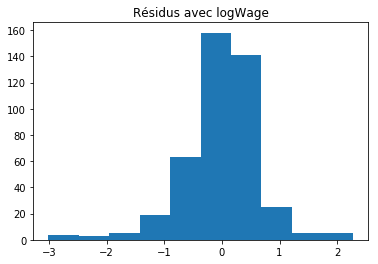

In [288]:
y = y.reshape(428,1)
res =  np.subtract(y, np.dot(B.reshape(1,-1),X.T).T)
plt.hist(res)
plt.title('Résidus avec logWage')
plt.show()

En passant les salaires au logarithme:
<ul>
<li>on observe la perte de la queue de distribution (la "skewness" alias le coefficient de dissymétrie, devrait donc se rapprocher de zéro en valeur absolue - se rapprocher donc de la symétrie.)</li>
<li>On observe aussi un aplatissement de la cloche (i.e. que le kurtosis est plus faible)</li>
</ul>

### 9. Tester l'hypothèse de non significativité de exper avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values.

On a 421 degrés de liberté (428 observations - 6 variables explicative - 1 constante)<br>
H0 : la variable 'exper' n'est pas significative

In [289]:
# écart-type du Beta estimé de la variable 'exper'
sigma = res.T.dot(res) / 421
# std_dev sur toutes les variables explicatives
std_dev = np.sqrt(np.diag(sigma[0][0] * np.linalg.inv(X.T.dot(X))))
student = B / std_dev
print('B[exper] =', B[3])
print('student[exper] =', student[3])
print('\nstudent =', student)

B[exper] = 0.0154878708067
student[exper] = 3.45171805756

student = [-1.92694611  0.50254687  6.77056114  3.45171806  1.46595174 -0.53105217
 -0.43435772]


In [290]:
print('\nStudent, n=421, p<alpha=90%   >>>>> t_alpha / 2 =', stats.t.ppf(1-0.01, 421))
print('Student, n=421, p<alpha=10%  >>>>> t_alpha / 2 =', stats.t.ppf(0.01, 421))

print('\nStudent, n=421, p<alpha=95%  >>>>> t_alpha / 2 =', stats.t.ppf(1-0.005, 421))
print('Student, n=421, p<alpha=5%  >>>>> t_alpha / 2 =', stats.t.ppf(0.005, 421))

print('\nStudent, n=421, p<alpha=99%  >>>>> t_alpha / 2 =', stats.t.ppf(1-0.001, 421))
print('Student, n=421, p<alpha=1%  >>>>> t_alpha / 2 =', stats.t.ppf(0.001, 421))


Student, n=421, p<alpha=90%   >>>>> t_alpha / 2 = 2.33523789381
Student, n=421, p<alpha=10%  >>>>> t_alpha / 2 = -2.33523789381

Student, n=421, p<alpha=95%  >>>>> t_alpha / 2 = 2.58755757305
Student, n=421, p<alpha=5%  >>>>> t_alpha / 2 = -2.58755757305

Student, n=421, p<alpha=99%  >>>>> t_alpha / 2 = 3.10970287446
Student, n=421, p<alpha=1%  >>>>> t_alpha / 2 = -3.10970287446


In [291]:
pval = stats.t.sf(np.abs(student[3]), 421)*2  # two-sided pvalue = Proba(abs(student)>student)
print(pval)

0.000613365572396


La p-value très inférieure à 1% nous permet de dire que l'on rejette l'hypothèse H0 au risque 1%. Le coefficient n'est donc pas nul au risque 1%.

### 10. Tester l’hypothèse que le coefficient associé à educ est égal à 10% avec un seuil de significativité de 5% (test à alternatif des deux côtés)

In [292]:
stat_educ = (B[2] - 0.1) / np.std(X['educ'])
print("stat_educ =", stat_educ)
pval_educ = stats.t.sf(np.abs(student[2]), 421)*2  # two-sided pvalue = Proba(abs(student)>student)
print("pval_educ =", pval_educ)

stat_educ = 0.000984593652241
pval_educ = 4.32454382816e-11


La p-value est inférieure au seuil significativité à 5% donc on rejette l'hypothèse au risque 5%.

### 11. Tester l’hypothèse jointe que le rendement de l’éducation est de 10% et que celui de l’expérience professionnelle est de 5%.

Modèle contraint : H0 : B1 = 0 et B2 = 0 <br>
Modèle non contraint : H1 : B1 <> 0 et B2 <> 0 (I.E. B1 peut être égal à 10 % et B2 peut être égale à 5 %)

In [293]:
# Modèle contraint c'est à dire B_educ = 0 et B_exper = 0
const = pd.DataFrame(np.ones(428))
X_joint = pd.concat([const,df[['city','nwifeinc','kidslt6','kidsge6']]], ignore_index=True, axis=1)
X_joint.columns = ['const','city','nwifeinc','kidslt6','kidsge6']
y = df['logwage']
print(X_joint.head())

B_joint = np.dot(np.dot(np.linalg.inv(np.dot(X_joint.T, X_joint)),X_joint.T),y)
res_joint = y - X_joint.dot(B_joint)
ssr0 = res_joint.T.dot(res_joint)
print("ssr0 =", ssr0)

   const  city   nwifeinc  kidslt6  kidsge6
0    1.0     0  10.910060        1        0
1    1.0     1  19.499980        0        2
2    1.0     0  12.039910        1        3
3    1.0     0   6.799996        0        3
4    1.0     1  20.100060        1        2
ssr0 = 214.779668493


In [294]:
# Modèle non contraint
ssr1 = float(res.T.dot(res))
print("ssr1 =", ssr1)

F = ((ssr0 - ssr1) / ssr1) * (421 / 2) # ((SSR_c - SSR_nc) / SSR_nc) 
                                     # fois  (DDL_c / (DDL_nc - DDL_c)) 
print("F =", F)
p_value_F = stats.f.sf(F,2,421)
print("p_value_F =", p_value_F)


ssr1 = 188.58997319394953
F = 29.2323646224
p_value_F = 1.29450352752e-12


La P_value est très inférieure à 1%. Nous pouvons donc rejeter H0 au risque 1% et donc ces coefficients sont non nuls et potentiellement égaux à 5% et 10%.

### 12. De combien augmente le salaire en pourcentage avec 10 années d’expérience ?

Le salaire augmente de 10 * 0.01549 = 15,49 %

### 13. Tester l’égalité des coefficients associés aux variables kidsge6 et kidslt6. Interprétez.

Hypothèse H0 : Bkidsgt6 = Bkidslt6 <br>
Hypothèse H1 : Bkidsgt6 <> Bkidlt6

In [295]:
const = pd.DataFrame(np.ones(428))
X_kids6 = X['kidsge6'] + X['kidslt6']
X_kids6 = pd.concat([const, df[['city','educ','exper','nwifeinc','kidslt6']], X_kids6]
                    , ignore_index=True, axis=1)
X_kids6.columns = ['const','city','educ','exper','nwifeinc','kidslt6','kids6ge6 + kidslt6']
y = df['logwage']
B_kids6 = np.dot(np.dot(np.linalg.inv(np.dot(X_kids6.T, X_kids6)),X_kids6.T),y)
print(B_kids6)
y = y.reshape(428, 1)

[-0.3989751   0.03526789  0.10224754  0.01548787  0.0048827  -0.03359935
 -0.01170351]


In [296]:
res =  np.subtract(y, np.dot(B_kids6.reshape(1,-1),X_kids6.T).T)
# écart-type du Beta estimé de la variable 'kids6'
sigma = res.T.dot(res) / 421
# std_dev sur toutes les variables explicatives
std_dev = np.sqrt(np.diag(sigma * np.linalg.inv(X_kids6.T.dot(X_kids6))))
student = B_kids6 / std_dev
print("Statistique de Student : ", student)

pval = stats.t.sf(np.abs(student[-2]), 421)*2  # two-sided pvalue = Proba(abs(student)>student)
print("P-value du test : ", pval)


Statistique de Student :  [-1.92694611  0.50254687  6.77056114  3.45171806  1.46595174 -0.37174725
 -0.43435772]
P-value du test :  0.710268070738


Nous ne pouvons pas rejeter l'hypothèse d'égalité des coefficients kidslt6 kidsgt6.

### 14. En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire.

Hypothèse H0: Hétéroscédasticité, les coéfficients Beta sont non nuls, modèle non-contraint.<br>
Hypothèse H1 : Homoscédasticité, les coéfficents Beta sont nuls, modèle contraint.

In [297]:
# Nous repartons du modèle de la question 7
const = pd.DataFrame(np.ones(428))
X = pd.concat([const,df[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]], ignore_index=True, axis=1)
X.columns = ['const','city','educ','exper','nwifeinc','kidslt6','kidsge6']
y = df['wage']
print(X.head())

   const  city  educ  exper   nwifeinc  kidslt6  kidsge6
0    1.0     0    12     14  10.910060        1        0
1    1.0     1    12      5  19.499980        0        2
2    1.0     0    12     15  12.039910        1        3
3    1.0     0    12      6   6.799996        0        3
4    1.0     1    14      7  20.100060        1        2


In [298]:
# Calcul du résidus
B = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)
print(B.shape)
print(list(zip(X.columns,B)))
res =  y - np.dot(X, B)
print(res.shape) 

(7,)
[('const', -2.403453991547134), ('city', 0.36975202950519659), ('educ', 0.46004770125863242), ('exper', 0.023819947951075317), ('nwifeinc', 0.015244793576326351), ('kidslt6', 0.036173191389278325), ('kidsge6', -0.061890909685711731)]
(428,)


In [299]:
# Test d'hétéroscedasticité à partir du carré des résidus
u_carre = res**2 # Carrés des résidus du modèle contraint
y = u_carre
print(y.shape)

(428,)


In [300]:
## Test de Fisher

# Modèle non-contraint
B = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)
print(B.shape)
print(X.shape)
res =  y - X.dot(B)
ssr0 = res.T.dot(res)
print("ssr0 =", ssr0)

# Modèle contraint
X = const
print(X.shape)
B = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)
res =  np.subtract(y, np.dot(B, X.T).T)
ssr1 = res.T.dot(res)
print("ssr1 =", ssr1)

F = ((ssr1 - ssr0) / ssr0) * (421 / 6) # ((SSR non contraint - SSR contraint) / SSR contraint) 
                                     # fois  (DDL non contraint / (DDLcontraint - DDL non contraint)) 
print("F =", F)
p_value_F = stats.f.sf(F,7,428)
print("p_value_F =", p_value_F)

(7,)
(428, 7)
ssr0 = 756183.49603
(428, 1)
ssr1 = 773347.081345
F = 1.59261816202
p_value_F = 0.135609964891


la p-value est supérieure à 5%, on ne peut pas rejeter l'hypothèse d'hétéroscédasticité au risque 5%.<br>
<br>
Pour corriger le problème par rapport à la variable la plus importante, on va centrer-réduire les Beta pour y trouver le plus gros coefficient.<br>

###  Corriger le problème par rapport à la variable la plus importante en utilisant la méthode des MCG. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

In [304]:
# variables initiales
const = pd.DataFrame(np.ones(428))
X_std = np.std(X, axis=1)
# Normalisons X
X = pd.DataFrame(X.values - X.mean().values, columns=X.columns)
X = X.div(X_std,axis='rows')

X = pd.concat([const,df[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]], ignore_index=True, axis=1)
X.columns = ['const','city','educ','exper','nwifeinc','kidslt6','kidsge6']
y = df['wage']

print('\nX_std.values.shape\n', X_std.values.shape)
print('\nX.head()\n', X.head())
print('\nX.head()\n', X.head())

# normalisons y

# calcul de Beta pour repérer celui qui est le plus important
B_norm = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)

print('\nB_norm\n', list(zip(B_norm, X.columns)))
print('\nLa variable la plus importante est la 2e, celle de l\'éducation : ' + str(B_norm[2]))

# Il faut maintenant corriger le X en le standardisant par la déviation standard (= écart-type) de l'éducation.
# car on suppose que c'est la plus forte variable qui apporte le plus de variabilité de la variance (i.e. d'hétéroscédasticité)
X_homo = X / np.std(X['educ'])
#print('\nX_homo\n', X_homo)

y_homo = df['wage'] / np.std(X['educ'])

B_homo = np.dot(np.dot(np.linalg.inv(np.dot(X_homo.T, X_homo)),X_homo.T),y_homo)
res_homo = y_homo - X_homo.dot(B_homo)

# on regarde maintenant l'écart type des résidus
sigma = res_homo.T.dot(res_homo) / 421
# std_dev sur toutes les variables explicatives
std_dev = np.sqrt(np.diag(sigma * np.linalg.inv(X_homo.T.dot(X_homo))))

print('\nstd_dev :\n', std_dev)

student = B_homo / std_dev
pval = stats.t.sf(np.abs(student), 421)*2  # two-sided pvalue = Proba(abs(student)>student)
print("\nP-value des coefficients : \n",pval)


X_std.values.shape
 (428,)

X.head()
    const  city  educ  exper   nwifeinc  kidslt6  kidsge6
0    1.0     0    12     14  10.910060        1        0
1    1.0     1    12      5  19.499980        0        2
2    1.0     0    12     15  12.039910        1        3
3    1.0     0    12      6   6.799996        0        3
4    1.0     1    14      7  20.100060        1        2

X.head()
    const  city  educ  exper   nwifeinc  kidslt6  kidsge6
0    1.0     0    12     14  10.910060        1        0
1    1.0     1    12      5  19.499980        0        2
2    1.0     0    12     15  12.039910        1        3
3    1.0     0    12      6   6.799996        0        3
4    1.0     1    14      7  20.100060        1        2

B_norm
 [(-2.403453991547134, 'const'), (0.36975202950519659, 'city'), (0.46004770125863242, 'educ'), (0.023819947951075317, 'exper'), (0.015244793576326351, 'nwifeinc'), (0.036173191389278325, 'kidslt6'), (-0.061890909685711731, 'kidsge6')]

La variable la plus im

La P Value nous permet de rejeter l'hypothèse d'hétéroscédasticité au risque 5%

In [268]:
# on avait pour la question 7

X = pd.concat([const,df[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]], ignore_index=True, axis=1)
X.columns = ['const','city','educ','exper','nwifeinc','kidslt6','kidsge6']
y = df['wage']

B = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)
res = y - X.dot(B)

# on regarde maintenant l'écart type des résidus
sigma = res.T.dot(res) / 421
# std_dev sur toutes les variables explicatives
std_dev = np.sqrt(np.diag(sigma * np.linalg.inv(X.T.dot(X))))

print('\nstd_dev :\n', std_dev)


std_dev :
 [ 0.96349591  0.32657023  0.07027516  0.02087998  0.01549936  0.39697399
  0.12538399]


La variance des Beta des variables explicatives corrigées est supérieure à celle d'origine.<br>
On a donc reporté la variance des résidus sur les variables explicatives.

### 15. Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Refaire le test avec 3 groupes (mutuellement exclusifs) : les femmes de moins de 30 ans, entre 30 et 43 ans, plus de 43 ans.

In [32]:
# on fait la régression avec les mêmes variables que dans la question 8
const = pd.DataFrame(np.ones(428))
X = pd.concat([const,df[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]], ignore_index=True, axis=1)
X.columns = ['const','city','educ','exper','nwifeinc','kidslt6','kidsge6']
y = df['logwage']

B = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)
print(list(zip(X.columns,B)))

y = y.reshape(428,1)
res =  np.subtract(y, np.dot(B.reshape(1,-1),X.T).T)

[('const', -0.39897509972710304), ('city', 0.035267892741029108), ('educ', 0.10224753616543258), ('exper', 0.01548787080672181), ('nwifeinc', 0.0048826964456007323), ('kidslt6', -0.045302857106304439), ('kidsge6', -0.011703505700940149)]


In [33]:
# on refait cette régression avec le 1er sous-groupe (>43 ans)

const = pd.DataFrame(np.ones(186))
df_sup43 = df[df['age']>43]
df_sup43.reset_index(inplace=True)
print(df_sup43.shape)
X_sup43 = pd.concat([const,df_sup43[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]], ignore_index=True, axis=1)
X_sup43.columns = ['const','city','educ','exper','nwifeinc','kidslt6','kidsge6']
y_sup43 = df_sup43['logwage']
B_sup43 = np.dot(np.dot(np.linalg.inv(np.dot(X_sup43.T, X_sup43)),X_sup43.T),y_sup43)
print(list(zip(X_sup43.columns,B_sup43)))
res_sup43 =  np.subtract(y_sup43, X_sup43.dot(B_sup43))

(186, 24)
[('const', -0.3232004115068165), ('city', -0.018840475129435277), ('educ', 0.08526538418697252), ('exper', 0.017837452510969319), ('nwifeinc', 0.0092695548966413577), ('kidslt6', -0.0091232338776318089), ('kidsge6', -0.024883088543249703)]


In [34]:
# on refait cette régression avec le 2e sous-groupe (<= 43 ans)

const = pd.DataFrame(np.ones(242))
df_inf43 = df[df['age']<= 43]
df_inf43.reset_index(inplace=True)
print(df_inf43.shape)
X_inf43 = pd.concat([const,df_inf43[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]], ignore_index=True, axis=1)
X_inf43.columns = ['const','city','educ','exper','nwifeinc','kidslt6','kidsge6']
y_inf43 = df_inf43['logwage']
B_inf43 = np.dot(np.dot(np.linalg.inv(np.dot(X_inf43.T, X_inf43)),X_inf43.T),y_inf43)
print(list(zip(X_inf43.columns,B_inf43)))
res_inf43 =  np.subtract(y_inf43, X_inf43.dot(B_inf43))

(242, 24)
[('const', -0.54117701632702442), ('city', 0.084997662174606775), ('educ', 0.11672533500572489), ('exper', 0.020163177502732235), ('nwifeinc', 0.0025589331430085393), ('kidslt6', -0.093295321473299178), ('kidsge6', -0.023322836691759094)]


In [35]:
## Test de Fisher

# Modèle non-contraint: régression classique
B = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)),X.T),y)
print(B.shape)
print(X.shape)
res =  y - X.dot(B)
ssr = res.T.dot(res)
print("ssr =", ssr[0][0])

# Modèle contraint : on fait la somme des carrés des résidus pour les deux sous-régressions

ssr1 = res_sup43.T.dot(res_sup43)
print("ssr1 =", ssr1)

ssr2 = res_inf43.T.dot(res_inf43)
print("ssr2 =", ssr2)

F = ((ssr - (ssr1 + ssr2)) / 7) / ((ssr1 + ssr2) / ((428 - 2 * 7)))
print("F =", F[0][0])
p_value_F = stats.f.sf(F,7,428)
print("p_value_F =", p_value_F[0][0])

(7, 1)
(428, 7)
ssr = 188.589973194
ssr1 = 75.3481636807
ssr2 = 110.64408874
F = 0.826037787107
p_value_F = 0.566015190003


On ne peut pas rejeter H0 au risque 5% <br>
Le delta entre les deux modèles est donc non nuls a priori.<br>
C'est-à-dire qu'il y a donc potentiellement un changement de structure sur l'âge.<br>

In [36]:
# on teste maintenant la partition en 3 catégories Vs les 2 catégories précédentes
ssr = ssr1 + ssr2

In [37]:
# on refait deux régressions pour les moins de 43 ans, pour deux catégories : âge<=30   et   30<âge<43

const = pd.DataFrame(np.ones(19))
df_inf30 = df[df['age'] <= 30]
print(df_inf30.shape)
df_inf30.reset_index(inplace=True)
print(df_inf30.shape)
X_inf30 = pd.concat([const,df_inf30[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]], ignore_index=True, axis=1)
X_inf30.columns = ['const','city','educ','exper','nwifeinc','kidslt6','kidsge6']
y_inf30 = df_inf30['logwage']
B_inf30 = np.dot(np.dot(np.linalg.inv(np.dot(X_inf30.T, X_inf30)),X_inf30.T),y_inf30)
print(list(zip(X_inf30.columns,B_inf30)))
res_inf30 =  np.subtract(y_inf30, X_inf30.dot(B_inf30))


(19, 23)
(19, 24)
[('const', -2.1113319416911951), ('city', -0.19463445345749836), ('educ', 0.22197278403210588), ('exper', 0.052105024019093032), ('nwifeinc', 0.016097175638518806), ('kidslt6', -0.20868992748898788), ('kidsge6', 0.089800745191328579)]


In [38]:
# avec le sous-groupe d'âge compris entre 30 et 43 ans

const = pd.DataFrame(np.ones(223))
df_30_43 = df[ (df['age'] <= 43) & (df['age'] > 30)]
print(df_30_43.shape)
df_30_43.reset_index(inplace=True)
print(df_30_43.shape)
X_30_43 = pd.concat([const,df_30_43[['city','educ','exper','nwifeinc','kidslt6','kidsge6']]], ignore_index=True, axis=1)
X_30_43.columns = ['const','city','educ','exper','nwifeinc','kidslt6','kidsge6']
y_30_43 = df_30_43['logwage']
B_30_43 = np.dot(np.dot(np.linalg.inv(np.dot(X_30_43.T, X_30_43)),X_30_43.T),y_30_43)
#print(y_30_43)
#print(X_30_43)
print(list(zip(X_30_43.columns,B_30_43)))
res_30_43 =  y_30_43 - X_30_43.dot(B_30_43)
print(res_30_43.shape)

(223, 23)
(223, 24)
[('const', -0.52452319623396271), ('city', 0.088950017442001289), ('educ', 0.11162650804943405), ('exper', 0.021064202554863104), ('nwifeinc', 0.0028403413687767124), ('kidslt6', -0.089246644306709519), ('kidsge6', -0.013521498579149851)]
(223,)


In [39]:
## Test de Fisher

# Modèle non-contraint: régression classique
# rappel : ssr = ssr1 + ssr2
print("ssr =", ssr)

# Modèle contraint : on fait la somme des carrés des résidus pour les deux sous-régressions

ssr2_1 = res_inf30.T.dot(res_inf30)
print("ssr2_1 =", ssr2_1)

ssr2_2 = res_30_43.T.dot(res_30_43)
print("ssr2_2 =", ssr2_2)

F = ((ssr - (ssr1 + ssr2_1 + ssr2_2)) / 7) / ((ssr1 + ssr2_1 + ssr2_2) / ((428 - 3 * 7)))
print("F =", F)
p_value_F = stats.f.sf(F,7,428)
print("p_value_F =", p_value_F)

ssr = 185.99225242
ssr2_1 = 3.38721490283
ssr2_2 = 106.093442568
F = 0.36598847323
p_value_F = 0.921799163068


On ne peut donc pas rejeter l'hypothèse de changement de structure en 3 catégories à 92 % par rapport au changement en 2 catégories.

### 16. A partir de la variable kidslt6, créer un ensemble de variables binaires pour le nombre d’enfants de moins de 6 ans. Refaire la question 8 avec ces variables et en utilisant comme référence les femmes qui ont des enfants de plus de 6 ans. Ces catégories sont-elles mutuellement exclusives ? Interprétez les paramètres associés aux variables binaires. Faire le test de non significativité de l’ensemble des variables binaires.

### 17. Créer une variable binaire pour les femmes qui ont des enfants de moins de 6 ans. Créer un terme d’interaction entre le nombre d’enfants de moins deux ans et l’éducation. Faire la régression de lwage sur une constante, city, educ, exper, nwifeinc,  et ces deux dernières variables. Faire le test de significativité du terme d’interaction. Interpréter.

## Séries temporelles

### 1. Ouvrir le fichier volat.raw; importer les données sur matlab en recodant les valeurs manquantes en -9999.

In [112]:
columns = ['date','sp500','divyld','i3','ip','pcsp','rsp500','pcip','ci3','ci3_1','ci3_2','pcip_1','pcip_2','pcip_3',                   
'pcsp_1','pcsp_2','pcsp_3']

df = pd.read_csv('textfiles/VOLAT.raw', sep='\s+', names=columns)
df = df.copy().replace('.',-9999)
df = df.copy().astype(float)
print(df.head())


      date  sp500  divyld    i3    ip        pcsp      rsp500         pcip  \
0  1947.01  15.21    4.49  0.38  22.4 -9999.00000 -9999.00000 -9999.000000   
1  1947.02  15.80    4.38  0.38  22.5    46.54833    50.92833     5.357163   
2  1947.03  15.16    4.61  0.38  22.6   -48.60762   -43.99762     5.333354   
3  1947.04  14.60    4.75  0.38  22.5   -44.32714   -39.57714    -5.309754   
4  1947.05  14.34    5.05  0.38  22.6   -21.36988   -16.31988     5.333354   

      ci3   ci3_1   ci3_2       pcip_1       pcip_2       pcip_3      pcsp_1  \
0 -9999.0 -9999.0 -9999.0 -9999.000000 -9999.000000 -9999.000000 -9999.00000   
1     0.0 -9999.0 -9999.0 -9999.000000 -9999.000000 -9999.000000 -9999.00000   
2     0.0     0.0 -9999.0     5.357163 -9999.000000 -9999.000000    46.54833   
3     0.0     0.0     0.0     5.333354     5.357163 -9999.000000   -48.60762   
4     0.0     0.0     0.0    -5.309754     5.333354     5.357163   -44.32714   

       pcsp_2      pcsp_3  
0 -9999.00000 -9999.00

### 2. Pourquoi doit-on stationnariser les séries ?

On doit stationnariser les séries pour que l'on puisse utiliser les hypothèses sous-jacentes à la modélisation en series temporelles : pour application du Théorème de WALD (~Gauss Markov). Les seules séries que l’on sache modéliser sont les séries stationnaires. Les autocorrélations se calculent sur des séries stationnaires, par exemple, et la non-stationnarité n’est pas une notion simple à définir (tout comme la non-indépendance entre variables aléatoires)…..C'est à dire que la série ne suit pas une tendance au cours du temps.

### 3. Faire le test de racine unitaire de log(sp500), de pcsp de div

Tet de Dickey-Fuller : <br>
H0 : La série est non-stationnaire ie il y'a une racine unitaire<br>
H1 : La série est stationnaire <br>

In [113]:
from statsmodels.tsa.stattools import adfuller

# Test pour log(sp500)
t, p_value, lags, obs, crit_val, regression = adfuller(np.log(df.sp500))
print("Statistique de test : ", t, "\nP_value : ", p_value, "\nnb_lags : ", lags)

Statistique de test :  -0.631687238281 
P_value :  0.863660072291 
nb_lags :  2


On ne peut pas rejeter l'hypothèse de non-stationnarité au risque 5% 

In [114]:
# Test pour pcsp
t, p_value, lags, obs, crit_val, regression = adfuller(df['pcsp'])
print("Statistique de test : ", t, "\nP_value : ", p_value, "\nnb_lags : ", lags)

Statistique de test :  -18.1573541263 
P_value :  2.46663340518e-30 
nb_lags :  1


On rejette l'hypothèse de non-stationnarité au risque 5%

D'après le test ADF, on rejette l'hypothèse H0, la série 

In [115]:
# Test pour Div
t, p_value, lags, obs, crit_val, regression = adfuller(df['divyld'])
print("Statistique de test : ", t, "\nP_value : ", p_value, "\nnb_lags : ", lags)

Statistique de test :  -1.99128609257 
P_value :  0.290406865746 
nb_lags :  3


On ne peut pas rejeter l'hypothèse de non-stationnarité au risque 5%

### 4. Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de pcsp et de divyld. Quelle est la différence entre ces deux graphiques ?

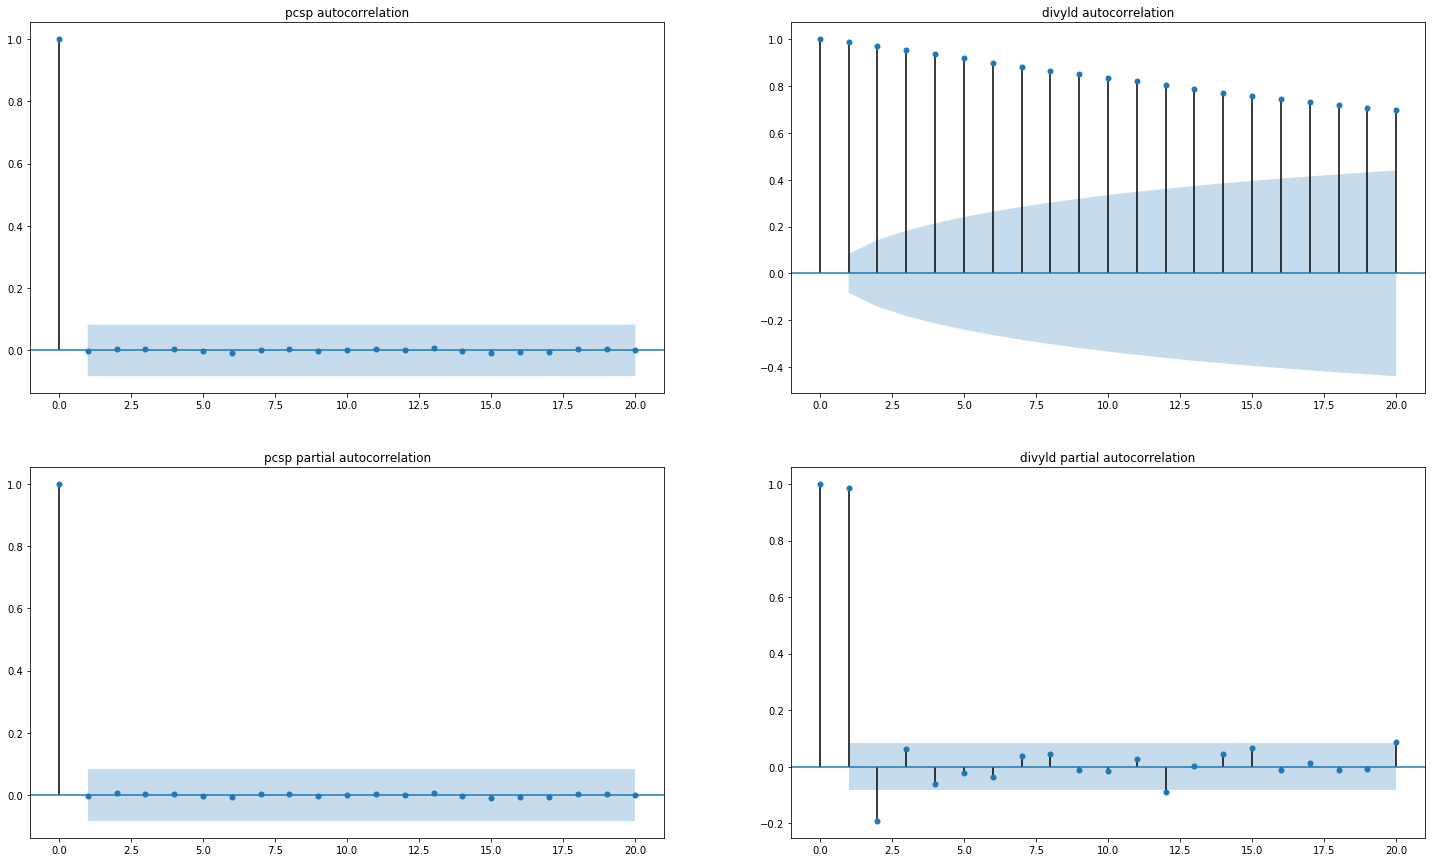

In [116]:
fig = plt.figure(figsize=(25, 15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(222)
ax4 = fig.add_subplot(224)

# pcsp
plot_acf(df['pcsp'], lags=20, ax=ax1)
ax1.set_title('pcsp autocorrelation')
plot_pacf(df['pcsp'], lags=20, ax=ax2)
ax2.set_title('pcsp partial autocorrelation')

# divyld
plot_acf(df['divyld'], lags=20, ax=ax3)
ax3.set_title('divyld autocorrelation')
plot_pacf(df['divyld'], lags=20, ax=ax4)
ax4.set_title('divyld partial autocorrelation')

plt.show()



Nous observons que la première série (PCSP) n'est pas auto-corrélée et que la seconde (Divyld) semble être corrélée à l'ordre 2

### 5. Proposer une modélisation AR(p) d’une série de votre choix, en utilisant tous les outils vus au cours.

In [117]:
X = df['pcsp']
print(X.head())

0   -9999.00000
1      46.54833
2     -48.60762
3     -44.32714
4     -21.36988
Name: pcsp, dtype: float64


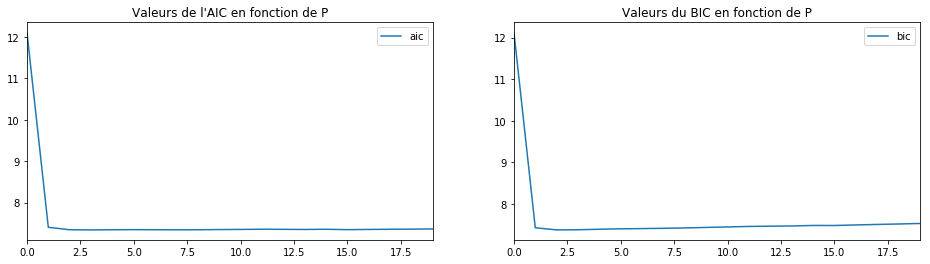

minimum p for aic :  3
minimum p for bic :  2
selected p        :  2  with  bic


In [118]:
date = df['date'].apply(lambda x:parse(str(int(ceil(modf(x)[0]*100))) + '/01/' + str(int(modf(x)[1]))))
m_pcsp = pd.Series(df['pcsp'].tolist(), index=date, dtype=float)
ar_mod = AR(m_pcsp)

lags = 20
bic_list = []
aic_list = []

for i in range(0, lags):
    res = ar_mod.fit(i)
    aic_list.append(res.aic)
    bic_list.append(res.bic)

    
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 4)
pd.DataFrame(aic_list, columns=['aic']).plot(ax=ax1)
legend = ax1.legend(loc = 'best')
ax1.set_title('Valeurs de l\'AIC en fonction de P')
pd.DataFrame(bic_list, columns=['bic']).plot(ax=ax2)
legend = ax2.legend(loc = 'best')
ax2.set_title('Valeurs du BIC en fonction de P')

plt.show()
    
min_p_aic = aic_list.index(min(aic_list))
min_p_bic = bic_list.index(min(bic_list))
p =  min([min_p_aic, min_p_bic])
print('minimum p for aic : ', str(min_p_aic))
print('minimum p for bic : ', str(min_p_bic))
print('selected p        : ', str(p), ' with ', 'aic' if min_p_aic < min_p_bic else 'bic')


La série pcsp, qui est stationnaire et devrait être légèrement autocorrélée, peut être modelisée en AR(2) selon le critère du BIC

In [119]:
fitted_m = ar_mod.fit(p)
print("Paramètres du modèle :\n", fitted_m.params)

Paramètres du modèle :
 const    6.043693
L1.y     0.242299
L2.y     0.005859
dtype: float64


### 6. Faire des prévisions pour T+1, T+2, T+3 en utilisant le modèle AR(p) de question 5. Calculer les RMSE.

In [130]:
#print(ar_mod.predict(fitted_m.params))
B = fitted_m.params
len = df['pcsp'].shape[0]
print('len', len, '\n')

y_T1 = pd.Series(np.zeros(len))

y_T1 = B[0] + B[1] * df['pcsp'] + B[2] * df['pcsp'].shift(1)
y_T1 = y_T1[1:]
y_T1.reset_index(drop=True, inplace=True)
print('These are the values estimated at T+1, for each couple of y[T] and y[T-1] :\n\n', y_T1.head(), y_T1.tail())

len 558 

These are the values estimated at T+1, for each couple of y[T] and y[T-1] :

 0   -41.256907
1    -5.461187
2    -4.981502
3     0.606099
4    16.056536
Name: pcsp, dtype: float64 552    10.359415
553    11.717181
554     1.605353
555     7.357135
556     7.913120
Name: pcsp, dtype: float64


In [132]:
y_T2 = pd.Series(np.zeros(len - 1))

y_T2 = B[0] + B[1] * y_T1 + B[2] * df['pcsp'][:-1]
y_T2.reset_index(drop=True, inplace=True)
print(y_T2.head())
print(y_T2.tail())

0   -62.532039
1     4.993156
2     4.551912
3     5.930860
4     9.808982
Name: pcsp, dtype: float64
552    8.547154
553    8.987265
554    6.567320
555    7.715751
556    7.995466
Name: pcsp, dtype: float64


In [134]:
y_T3 = pd.Series(np.zeros(len-1))
y_T3 = B[0] + B[1] * y_T2 + B[2] * y_T1
print(y_T3.head())
print(y_T3.tail())

0   -9.349469
1    7.221536
2    7.117433
3    7.484286
4    8.514469
Name: pcsp, dtype: float64
552    8.175352
553    8.289945
554    7.644354
555    7.956315
556    8.027347
Name: pcsp, dtype: float64


In [139]:
# Calcul des RMSE

# on assigne la médiane aux valeur assignées auparavant à -9999
df['pcsp'][df['pcsp'] == -9999] = np.median(df['pcsp'])

df1 = df['pcsp'].shift(-1)[:-1]
df2 = df['pcsp'].shift(-2)[:-2]
df3 = df['pcsp'].shift(-3)[:-3]


print(df1.tail(), df2.tail(), df3.tail())

rmse_1 = np.sqrt(np.mean( (y_T1 - df1.reset_index(drop=True)) ** 2))
print('\nrmse_1', rmse_1)

rmse_2 = np.sqrt(np.mean( (y_T2 - df2.reset_index(drop=True)) ** 2))
print('\nrmse_2', rmse_2, '\n')

rmse_3 = np.sqrt(np.mean( (y_T3 - df3.reset_index(drop=True)) ** 2))
print('rmse_3', rmse_3, '\n')

552    17.838850
553    22.983900
554   -18.873330
555     5.877079
556     7.573267
Name: pcsp, dtype: float64 551    17.838850
552    22.983900
553   -18.873330
554     5.877079
555     7.573267
Name: pcsp, dtype: float64 550    17.838850
551    22.983900
552   -18.873330
553     5.877079
554     7.573267
Name: pcsp, dtype: float64

rmse_1 30.6729319735

rmse_2 39.7240610646 

rmse_3 40.2379965009 



## Séries temporelles partie 2

### 1. Ouvrir le fichier intdef Faire une régression de i3 sur inf_1, inf_2, inf_3 et def_1, def_2, def_3 où x_i représente la variable x laggée de i périodes.

In [209]:
columns = ['year','i3','inf','rec','out','def','i3_1','inf_1','def_1','ci3','cinf','cdef',
           'y77']
df = pd.read_csv('textfiles/intdef.raw', sep='\s+', names=columns)
df = df.copy().replace('.',0)
df = df.copy().astype(float)
i3 = df['i3']

In [210]:
### Création des séries inf lagguées
inf_2 = df['inf_1'].shift(1)
inf_3 = df['inf_1'].shift(2)
inf_2.name = "inf_2"
inf_3.name = "inf_3"
print(inf_1.head(),'\n', inf_2.head(), '\n', inf_3.head())

0    0.0
1    8.1
2   -1.2
3    1.3
4    7.9
Name: inf_1, dtype: float64 
 0    NaN
1    0.0
2    8.1
3   -1.2
4    1.3
Name: inf_2, dtype: float64 
 0    NaN
1    NaN
2    0.0
3    8.1
4   -1.2
Name: inf_3, dtype: float64


In [211]:
### Création des séries def lagguées
def_1 = df['def_1']
def_2 = df['def_1'].shift(1)
def_2.name = "def_2"
def_3 = df['def_1'].shift(2)
def_3.name = "def_3"
print(def_1.head(),'\n', def_2.head(), '\n', def_3.head())

0    0.000000
1   -4.600000
2   -0.200000
3    1.200001
4   -1.900001
Name: def_1, dtype: float64 
 0         NaN
1    0.000000
2   -4.600000
3   -0.200000
4    1.200001
Name: def_2, dtype: float64 
 0    NaN
1    NaN
2    0.0
3   -4.6
4   -0.2
Name: def_3, dtype: float64


In [212]:
formula1 = 'i3 ~ inf_1 + inf_2 + inf_3'


inf_df = pd.concat([i3, inf_1, inf_2, inf_3], axis=1)
print(inf_df.head())
model1 = smf.ols(formula1, data=inf_df)
results1 = model1.fit()
print(results1.summary())

     i3  inf_1  inf_2  inf_3
0  1.04    0.0    NaN    NaN
1  1.10    8.1    0.0    NaN
2  1.22   -1.2    8.1    0.0
3  1.55    1.3   -1.2    8.1
4  1.77    7.9    1.3   -1.2
                            OLS Regression Results                            
Dep. Variable:                     i3   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     21.71
Date:                Fri, 05 May 2017   Prob (F-statistic):           3.84e-09
Time:                        16:28:28   Log-Likelihood:                -109.61
No. Observations:                  54   AIC:                             227.2
Df Residuals:                      50   BIC:                             235.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err    

In [213]:
formula2 = 'i3 ~ def_1 + def_2 + def_3'
def_df = pd.concat([i3, def_1, def_2, def_3], axis=1)
model2 = smf.ols(formula2, data=df)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                     i3   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     8.085
Date:                Fri, 05 May 2017   Prob (F-statistic):           0.000173
Time:                        16:28:28   Log-Likelihood:                -121.45
No. Observations:                  54   AIC:                             250.9
Df Residuals:                      50   BIC:                             258.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6642      0.443      8.271      0.0

Intercept      3.6642      0.443      8.271      0.000       2.774       4.554
def_1          0.1725      0.247      0.698      0.489      -0.324       0.669
def_2          0.2564      0.270      0.950      0.347      -0.286       0.798
def_3          0.4353      0.224      1.944      0.058      -0.015       0.885

In [214]:
print("Impact de inf : \n","1 période : ", 0.5449, "2 périodes : ", 0.0081, "3 périodes : ", 0.2381,
      "long terme : ", 0.5449+0.0081+0.2381)
print("Impact de def : \n","1 période : ", 0.1725, "2 périodes : ", 0.2564,"3 périodes : ", 0.4353,
     "long terme : {}".format(0.1725+0.2564+0.4353, 1))

Impact de inf : 
 1 période :  0.5449 2 périodes :  0.0081 3 périodes :  0.2381 long terme :  0.7911
Impact de def : 
 1 période :  0.1725 2 périodes :  0.2564 3 périodes :  0.4353 long terme : 0.8642000000000001


<u>Commentez :</u>

Nous voyons que l'inflation a un impact fort à court terme sur le taux d'interêt.<br>
D'autre part, le deficit a court terme semble avoir peut d'impact, son effet est plus progressif.<br>
Les deux variables ont un impact similaire sur le taux d'interêt à long terme.

### 2. Tester l’auto-corrélation des erreurs

In [239]:
prediction1 = results1.predict(inf_df[['inf_1','inf_2','inf_3']])
errors = pd.DataFrame()
errors['pred1'] = df['i3'] - prediction1
errors['pred1 - 1'] = errors['pred1'].shift(1)

print(errors['pred1'].head(),'\n', errors['pred1 - 1'].head())

# régression MCO sur les erreurs.
results_err_1 = smf.ols('pred1 ~ pred1 - 1', data=errors).fit()

# Test de Student
print('Statistique de test  : ', str(results_err_1.tvalues[0]))
print('P valeur     : ', str(results_err_1.pvalues[0]))
print (results_err_1.summary())

0         NaN
1         NaN
2   -0.190962
3   -3.075925
4   -4.258822
Name: pred1, dtype: float64 
 0         NaN
1         NaN
2         NaN
3   -0.190962
4   -3.075925
Name: pred1 - 1, dtype: float64
Statistique de test  :  inf
P valeur     :  0.0
                            OLS Regression Results                            
Dep. Variable:                  pred1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Fri, 05 May 2017   Prob (F-statistic):               0.00
Time:                        16:54:27   Log-Likelihood:                    inf
No. Observations:                  54   AIC:                              -inf
Df Residuals:                      53   BIC:                              -inf
Df Model:                           1                                         
Covariance Type:            nonrobust  

#### Regardons maintenant la 2e série

In [238]:
prediction2 = results2.predict(def_df[['def_1','def_2','def_3']])
errors = pd.DataFrame()
errors['pred2'] = (df['i3'] - prediction2)
errors['pred2 - 1'] = errors['pred2'].shift()
errors['pred2'] = errors['pred2'].drop(df.index[0])
# régression MCO
results_err_2 = smf.ols('pred2 ~ pred2 - 1', data=errors).fit()

# Test de Student
print('Statistique de test  : ', str(results_err_2.tvalues[0]))
print('P valeur     : ', str(results_err_2.pvalues[0]))
print (results_err_2.summary())

Statistique de test  :  3.4930663426e+16
P valeur     :  0.0
                            OLS Regression Results                            
Dep. Variable:                  pred2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.220e+33
Date:                Fri, 05 May 2017   Prob (F-statistic):               0.00
Time:                        16:49:48   Log-Likelihood:                 1828.3
No. Observations:                  54   AIC:                            -3655.
Df Residuals:                      53   BIC:                            -3653.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

Hypothèse H0 : Les erreurs ne sont pas corrélées <br>
Hypothèse H1 : Existence d'un processus auto-regressif d'ordre 1
La statistique obtenue est de 0.481.
Nous regardons dans la table de Durbin Watson et les valeurs sur lesquelles nous pouvons avoir un doute sont : <br>
1.285 et 1.445 à 1% de significativité.

Nous pouvons donc rejeter H0, il est possible qu'il y ai une auto-corrélation positive d'ordre 1.


### 3. Tester l’hypothèse que les valeurs passées de inf n’ont pas d’impact sur i3.